1 Importação das bibliotecas

Objetivo: importar as bibliotecas necessárias para manipulação de dados, criação da rede neural, treinamento, avaliação e visualização dos resultados.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt


2 Carregamento do conjunto de dados MNIST

Objetivo: carregar automaticamente o banco de dados MNIST, que contém imagens de dígitos manuscritos (0 a 9), já rotuladas.

Cada imagem possui tamanho 28×28 pixels em escala de cinza.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


3 Pré-processamento dos dados

Objetivo: preparar os dados no formato adequado para uma Rede Neural Convolucional (CNN).

As etapas realizadas são:

normalização dos pixels para o intervalo [0,1];

inclusão do canal de cor (necessário para CNNs).

In [ ]:
x_train = (x_train.astype(np.float32) / 255.0)[..., None]
x_test  = (x_test.astype(np.float32)  / 255.0)[..., None]

print("Treino:", x_train.shape, y_train.shape)
print("Teste :", x_test.shape,  y_test.shape)


Treino: (60000, 28, 28, 1) (60000,)
Teste : (10000, 28, 28, 1) (10000,)


4 Definição da arquitetura da CNN

Objetivo: criar uma rede neural convolucional simples e eficiente, adequada para aplicações embarcadas (TinyML).

A rede é composta por:

camadas convolucionais para extração de características;

camadas de pooling para redução dimensional;

camadas densas para classificação final.

In [ ]:
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(8, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax"),
])


5 Compilação do modelo

Objetivo: definir os parâmetros de treinamento da rede, incluindo:

algoritmo de otimização;

função de perda;

métrica de avaliação.

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,410 (56.29 KB)

 Trainable params: 14,410 (56.29 KB)

 Non-trainable params: 0 (0.00 B)

6 Treinamento da CNN

Objetivo: treinar o modelo utilizando o conjunto de treinamento, reservando parte dos dados para validação.

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.6940 - loss: 0.9681 - val_accuracy: 0.9645 - val_loss: 0.1205
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.9564 - loss: 0.1412 - val_accuracy: 0.9720 - val_loss: 0.0919
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9685 - loss: 0.1036 - val_accuracy: 0.9728 - val_loss: 0.0887
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9728 - loss: 0.0856 - val_accuracy: 0.9800 - val_loss: 0.0714
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9758 - loss: 0.0796 - val_accuracy: 0.9817 - val_loss: 0.0636


7 Avaliação do modelo

Objetivo: avaliar o desempenho da CNN no conjunto de teste, que contém dados não vistos durante o treinamento.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Acurácia no conjunto de teste:", test_acc)


Acurácia no conjunto de teste: 0.9789999723434448


8 Matriz de confusão e relatório de classificação

Objetivo: analisar o desempenho do modelo para cada classe individualmente.

Essas métricas são importantes para compreender erros específicos de classificação.

In [ ]:
y_pred = np.argmax(model.predict(x_test, verbose=0), axis=1)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:\n", cm)

print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
 [[ 970    1    0    0    2    0    1    3    1    2]
 [   0 1129    3    0    0    0    0    1    2    0]
 [   3    3  996    4    4    1    0   12    9    0]
 [   0    0    0  994    1    3    0    5    4    3]
 [   1    1    0    0  975    0    0    3    0    2]
 [   1    0    0    3    1  879    3    0    1    4]
 [   9    3    0    0    9    7  927    0    3    0]
 [   0    1    6    4    3    0    0 1004    2    8]
 [   6    0    3    5    8    1    1    3  934   13]
 [   3    5    0    2    9    3    0    5    0  982]]

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.96      0.99      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.97      

9 Visualização da matriz de confusão

Objetivo: representar graficamente a matriz de confusão, facilitando a interpretação dos resultados.

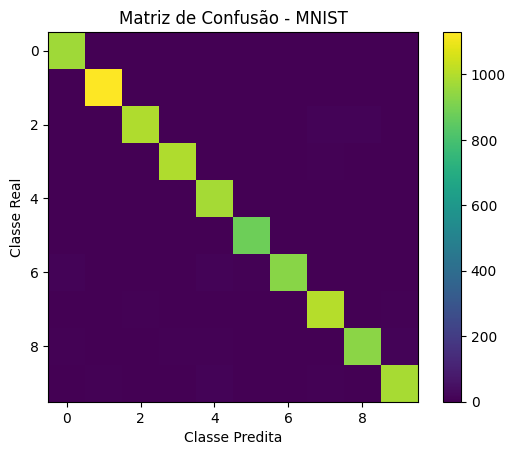

In [ ]:
plt.figure()
plt.imshow(cm, interpolation="nearest")
plt.title("Matriz de Confusão - MNIST")
plt.colorbar()
plt.xlabel("Classe Predita")
plt.ylabel("Classe Real")
plt.show()


10 Visualização da evolução do treinamento

Objetivo: acompanhar a evolução da acurácia e da função de perda ao longo das épocas.

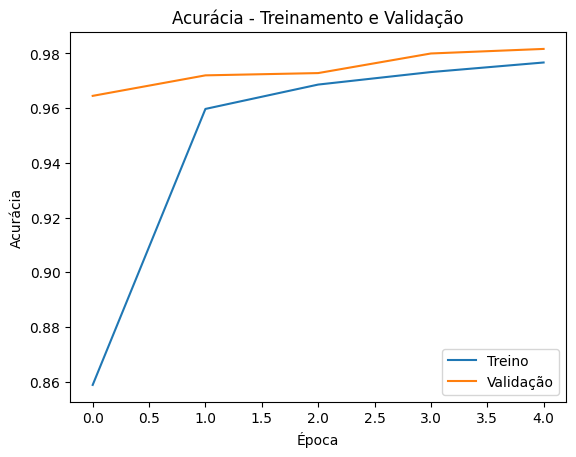

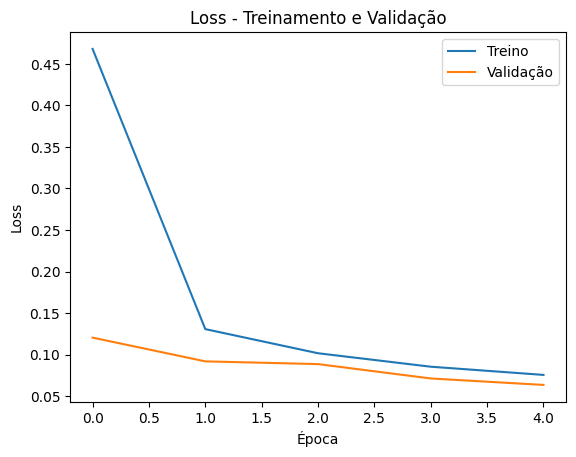

In [ ]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Acurácia - Treinamento e Validação")
plt.xlabel("Época")
plt.ylabel("Acurácia")
plt.legend(["Treino", "Validação"])
plt.show()

plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss - Treinamento e Validação")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend(["Treino", "Validação"])
plt.show()

Etapa 2 — Converter para TFLite INT8 e gerar o .h

2.1 Converter o modelo para TFLite com quantização INT8

Objetivo: gerar uma versão leve do modelo para rodar no microcontrolador.
A quantização INT8 reduz tamanho e memória e é ideal para TinyML.

Importante: esse bloco assume que você já tem a variável model treinada.

In [ ]:
import tensorflow as tf
import numpy as np

# Dataset representativo: usado para calibrar a quantização
def representative_dataset():
    for i in range(200):
        yield [x_train[i:i+1]]  # 1 imagem por vez

converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Ativa otimizações (inclui quantização)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_dataset

# Força INT8 completo (entrada e saída int8)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8

tflite_int8 = converter.convert()

print("Tamanho do modelo INT8 (bytes):", len(tflite_int8))


Saved artifact at '/tmp/tmpeksi5us0'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  134279775950544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134279775951696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134279775952080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134279775951120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134279775950736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134279775952272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134279775949584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134279775950928: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Tamanho do modelo INT8 (bytes): 20096


2.2 Salvar o arquivo .tflite

Objetivo: salvar o arquivo do modelo em formato TFLite.

In [ ]:
tflite_path = "mnist_cnn_int8.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_int8)

print("Arquivo salvo:", tflite_path)


Arquivo salvo: mnist_cnn_int8.tflite


2.3 Testar rapidamente o TFLite (garantir que não corrompeu)

Objetivo: validar que o arquivo TFLite executa corretamente no Colab.

In [ ]:
interpreter = tf.lite.Interpreter(model_content=tflite_int8)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()[0]
output_details = interpreter.get_output_details()[0]

print("Input:", input_details["dtype"], input_details["shape"], input_details["quantization"])
print("Output:", output_details["dtype"], output_details["shape"], output_details["quantization"])

# Teste simples com 1 imagem do conjunto de teste:
img = x_test[0:1]  # float32 [0,1]
label = y_test[0]

# Quantiza a imagem para int8 conforme scale/zero_point
scale, zp = input_details["quantization"]
img_q = np.round(img / scale + zp).astype(np.int8)
img_q = np.clip(img_q, -128, 127).astype(np.int8)

interpreter.set_tensor(input_details["index"], img_q)
interpreter.invoke()

out_q = interpreter.get_tensor(output_details["index"])[0]  # 10 classes int8

# Dequantiza para "probabilidades aproximadas"
out_scale, out_zp = output_details["quantization"]
out_f = (out_q.astype(np.float32) - out_zp) * out_scale

pred = int(np.argmax(out_f))
print("Label real:", int(label), "| Predito:", pred)
print("Scores:", out_f)


Input: <class 'numpy.int8'> [ 1 28 28  1] (0.003921568859368563, -128)
Output: <class 'numpy.int8'> [ 1 10] (0.00390625, -128)
Label real: 7 | Predito: 7
Scores: [0.         0.         0.         0.         0.         0.
 0.         0.99609375 0.         0.        ]


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


2.4 Gerar o arquivo .h (array C) para o Pico W

Objetivo: transformar o .tflite em um header C (mnist_cnn_int8_model.h) que será incluído no firmware.

In [ ]:
def tflite_to_c_header(tflite_bytes, var_name="mnist_cnn_int8_model"):
    hex_lines = []
    line = []
    for i, b in enumerate(tflite_bytes):
        line.append(f"0x{b:02x}")
        if len(line) >= 12:
            hex_lines.append(", ".join(line))
            line = []
    if line:
        hex_lines.append(", ".join(line))

    hex_blob = ",\n  ".join(hex_lines)

    return f"""#pragma once
#include <cstdint>

alignas(16) const unsigned char {var_name}[] = {{
  {hex_blob}
}};

const unsigned int {var_name}_len = {len(tflite_bytes)};
"""

header_text = tflite_to_c_header(tflite_int8, "mnist_cnn_int8_model")

h_path = "mnist_cnn_int8_model.h"
with open(h_path, "w") as f:
    f.write(header_text)

print("Header gerado:", h_path)


Header gerado: mnist_cnn_int8_model.h


2.5 Gerar mnist_samples.h (10 imagens: 0..9)

In [ ]:
import numpy as np

# x_train está em float32 [0,1] com shape (60000, 28, 28, 1) no seu notebook
# Vamos pegar 1 exemplo de cada dígito 0..9
x_src = x_train[..., 0]  # remove canal -> (60000, 28, 28)

labels = []
images = []

for digit in range(10):
    idx = np.where(y_train == digit)[0][0]   # primeira ocorrência
    img = x_src[idx]                         # 28x28 float [0,1]
    img_u8 = np.clip(np.round(img * 255.0), 0, 255).astype(np.uint8)
    labels.append(int(digit))
    images.append(img_u8.flatten())          # 784

labels = np.array(labels, dtype=np.int32)
images = np.stack(images, axis=0).astype(np.uint8)  # (10, 784)

print("Labels:", labels)
print("Images:", images.shape, images.dtype)


Labels: [0 1 2 3 4 5 6 7 8 9]
Images: (10, 784) uint8


2.6 Escrever o header C mnist_samples.h

In [ ]:
def to_c_array_u8(arr):
    return ", ".join(str(int(x)) for x in arr)

lines = []
lines.append("#pragma once")
lines.append("#include <stdint.h>")
lines.append("")
lines.append("static const int mnist_samples_count = 10;")
lines.append("static const int mnist_labels[10] = { " + ", ".join(map(str, labels.tolist())) + " };")
lines.append("")
lines.append("static const uint8_t mnist_images[10][28*28] = {")
for i in range(10):
    lines.append("  { " + to_c_array_u8(images[i]) + " },")
lines.append("};")
lines.append("")

with open("mnist_samples.h", "w") as f:
    f.write("\n".join(lines))

print("Gerado: mnist_samples.h")


Gerado: mnist_samples.h


2.7 — Baixar os arquivos gerados (3 arquivos)

In [ ]:
from google.colab import files

files.download("mnist_cnn_int8.tflite")
files.download("mnist_cnn_int8_model.h")
files.download("mnist_samples.h")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualizar as imagens geradas para o Pico

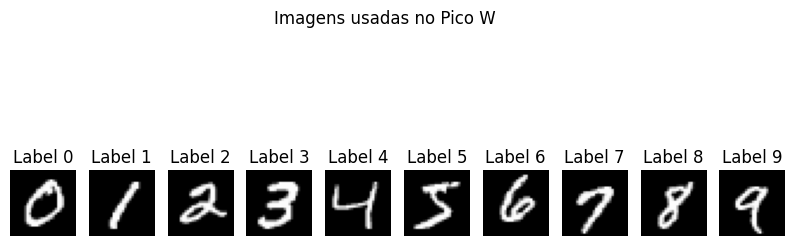

In [ ]:
plt.figure(figsize=(10, 4))

for i in range(10):
    img = images[i].reshape(28, 28)
    plt.subplot(1, 10, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label {labels[i]}")
    plt.axis("off")

plt.suptitle("Imagens usadas no Pico W")
plt.show()
